In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

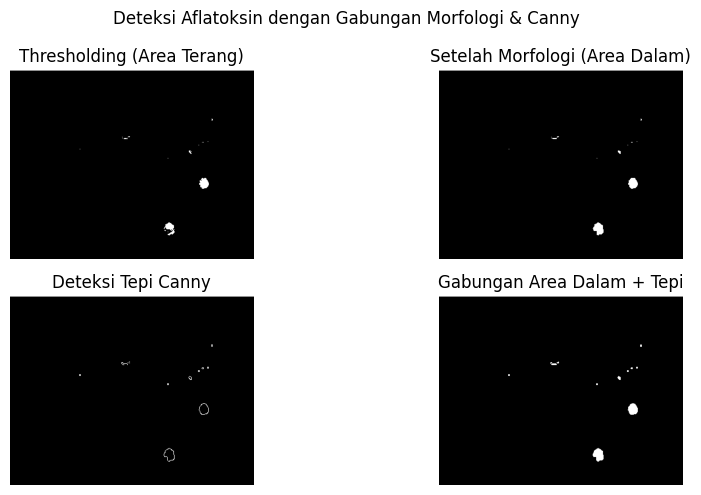

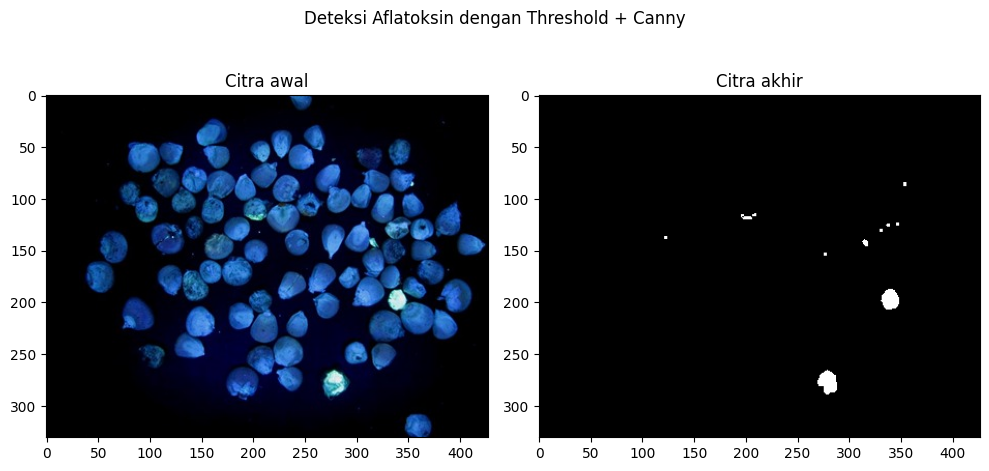

In [2]:
img_color = cv2.imread('ISO800.jpg') 
img_rgb = cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB)
img = cv2.imread('ISO800.jpg', cv2.IMREAD_GRAYSCALE)
bilateral = cv2.bilateralFilter(img, d=9, sigmaColor=75, sigmaSpace=100)

#thresholding untuk segmentasi area terang
_, binary_thresh = cv2.threshold(img, 170, 255, cv2.THRESH_BINARY)

#operasi morfologi closing untuk menyempurnakan area threshold
kernel = np.ones((5,5), np.uint8)
closing = cv2.morphologyEx(binary_thresh, cv2.MORPH_CLOSE, kernel)

#deteksi tepi dengan canny
edges = cv2.Canny(closing, threshold1=70, threshold2=170)

#menggabungkan hasil dari deteksi tepi dan area dalam morfologi
combined = cv2.bitwise_or(closing, edges)

#Visualisasi hasil
plt.figure(figsize=(10,5))

plt.subplot(2,2,1)
plt.imshow(binary_thresh, cmap='gray')
plt.title('Thresholding (Area Terang)')
plt.axis('off')

plt.subplot(2,2,2)
plt.imshow(closing, cmap='gray')
plt.title('Setelah Morfologi (Area Dalam)')
plt.axis('off')

plt.subplot(2,2,3)
plt.imshow(edges, cmap='gray')
plt.title('Deteksi Tepi Canny')
plt.axis('off')

plt.subplot(2,2,4)
plt.imshow(combined, cmap='gray')
plt.title('Gabungan Area Dalam + Tepi')
plt.axis('off')

plt.suptitle('Deteksi Aflatoksin dengan Gabungan Morfologi & Canny', fontsize=12)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(img_rgb)
plt.title('Citra awal')

plt.subplot(1,2,2)
plt.imshow(combined,cmap='gray')
plt.title('Citra akhir')

plt.suptitle('Deteksi Aflatoksin dengan Threshold + Canny')
plt.tight_layout()
plt.show()

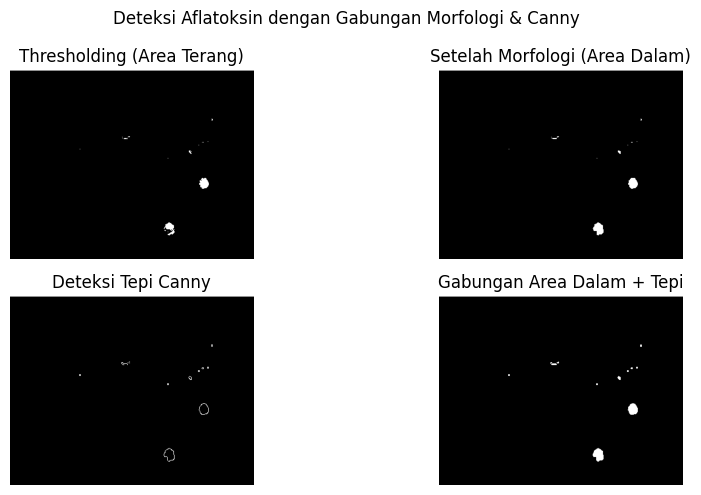

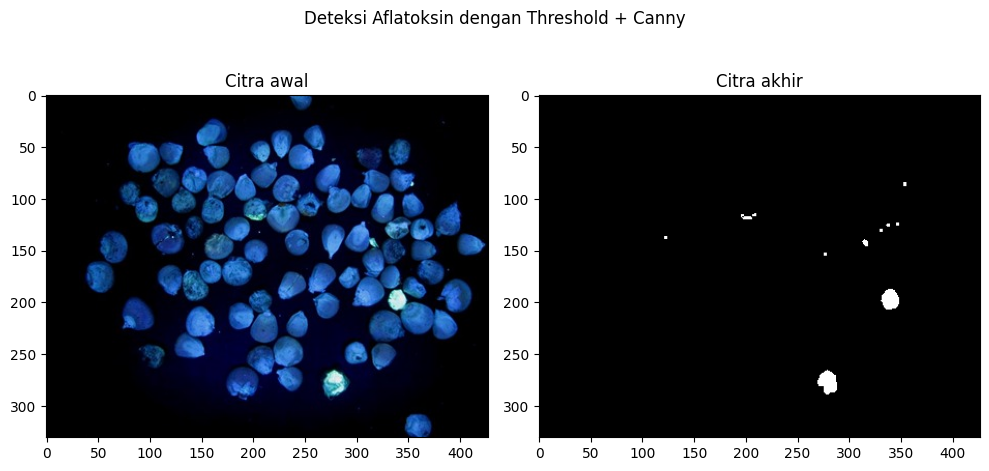

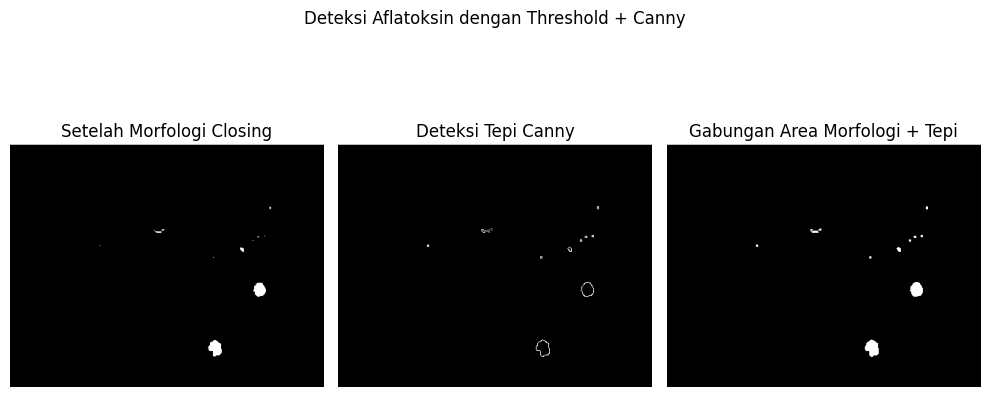

In [91]:
# 1. Load citra grayscale jagung UV
img_color2 = cv2.imread('ISO800.jpg')  # tanpa flag grayscale
img_rgb2 = cv2.cvtColor(img_color2, cv2.COLOR_BGR2RGB)
img2 = cv2.imread('ISO800.jpg', cv2.IMREAD_GRAYSCALE)

# 2. Thresholding untuk segmentasi area terang (aflatoksin)
_, binary_thresh2 = cv2.threshold(img2, 170, 255, cv2.THRESH_BINARY)

# Operasi morfologi closing untuk mengisi lubang pada area threshold
kernel = np.ones((5,5), np.uint8)
closing2 = cv2.morphologyEx(binary_thresh2, cv2.MORPH_CLOSE, kernel)

# 3. Deteksi tepi dengan Canny
edges2 = cv2.Canny(closing2, threshold1=70, threshold2=170)

combined2 = cv2.bitwise_or(closing2, edges2)
# 4. Visualisasi hasil
plt.figure(figsize=(10,5))

plt.subplot(2,2,1)
plt.imshow(binary_thresh2, cmap='gray')
plt.title('Thresholding (Area Terang)')
plt.axis('off')

plt.subplot(2,2,2)
plt.imshow(closing2, cmap='gray')
plt.title('Setelah Morfologi (Area Dalam)')
plt.axis('off')

plt.subplot(2,2,3)
plt.imshow(edges2, cmap='gray')
plt.title('Deteksi Tepi Canny')
plt.axis('off')

plt.subplot(2,2,4)
plt.imshow(combined2, cmap='gray')
plt.title('Gabungan Area Dalam + Tepi')
plt.axis('off')

plt.suptitle('Deteksi Aflatoksin dengan Gabungan Morfologi & Canny', fontsize=12)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(img_rgb2)
plt.title('Citra awal')

plt.subplot(1,2,2)
plt.imshow(combined2,cmap='gray')
plt.title('Citra akhir')

plt.suptitle('Deteksi Aflatoksin dengan Threshold + Canny')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
plt.imshow(closing2, cmap='gray')
plt.title('Setelah Morfologi Closing')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(edges2, cmap='gray')
plt.title('Deteksi Tepi Canny')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(combined2, cmap='gray')
plt.title('Gabungan Area Morfologi + Tepi')
plt.axis('off')

plt.suptitle('Deteksi Aflatoksin dengan Threshold + Canny')
plt.tight_layout()
plt.show()